In [1]:
import gpxpy
import gpxpy.gpx
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from folium.vector_layers import Rectangle
from shapely.geometry import LineString
from shapely.ops import unary_union

In [2]:
import numpy as np
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
qt3 = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            qt3.append((point.latitude, point.longitude))

observations_array = np.array(qt3)
qt3 = observations_array[148:200]


In [3]:
import folium
from gpxpy import parse

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = parse(gpx_file)

map_center3 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap3 = folium.Map(location=map_center3, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs3 = [(point.latitude, point.longitude) for point in segment.points[148:200]]  
        folium.PolyLine(lat_lon_pairs3, color="blue", weight=2.5, opacity=1).add_to(mymap3)

mymap3


In [4]:
import folium
from shapely.geometry import LineString
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

all_points3 = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points3.extend([(point.longitude, point.latitude) for point in segment.points[148:200]]) 

route_line3 = LineString(all_points3)
buffer_distance3 = 0.001  
route_buffer3 = route_line3.buffer(buffer_distance3)
map_center3 = route_line3.centroid.coords[0][::-1] 
mymap3 = folium.Map(location=map_center3, zoom_start=14)
lat_lon_pairs3 = [(point[1], point[0]) for point in route_line3.coords]
folium.PolyLine(lat_lon_pairs3, color="blue", weight=2.5, opacity=1).add_to(mymap3)
route_buffer_geojson3 = route_buffer3.__geo_interface__
folium.GeoJson(route_buffer_geojson3, name='geofence').add_to(mymap3)
mymap3


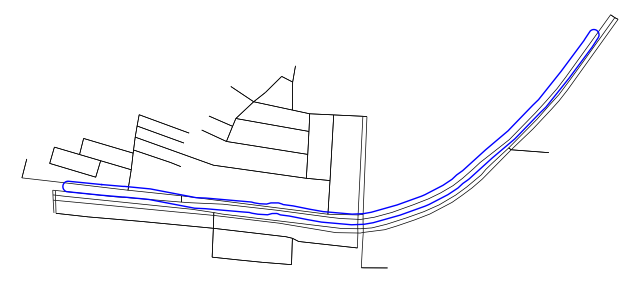

In [5]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon3 = route_buffer3.convex_hull
G3 = ox.graph_from_polygon(route_polygon3, network_type='drive')
fig3, ax3 = ox.plot_graph(G3, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer3 = route_line3.buffer(0.0001)  
ax3.plot(*route_line_buffer3.exterior.xy, color='blue', linewidth=1)
ax3.plot(*route_line_buffer3.exterior.xy[148:200], color='blue', linewidth=1)
plt.show()


In [6]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon3 = route_buffer3.convex_hull
G3 = ox.graph_from_polygon(route_polygon3, network_type='drive')
states3 = np.array([(data3['y'], data3['x']) for node, data3 in G3.nodes(data=True)])
print("Number of nodes:", len(states3))
print("Node coordinates:")
for node in states3:
    print(node)

Number of nodes: 74
Node coordinates:
[12.9172868 77.641843 ]
[12.9151811 77.6368786]
[12.9153217 77.6353468]
[12.915224 77.636324]
[12.915268  77.6358679]
[12.9160375 77.6334544]
[12.9161458 77.6323351]
[12.9160778 77.632965 ]
[12.9169653 77.6337861]
[12.9198251 77.6431146]
[12.9173754 77.6410678]
[12.9198785 77.6430337]
[12.9174969 77.6356227]
[12.9187202 77.6366886]
[12.9172538 77.6371917]
[12.9182437 77.6361483]
[12.9175785 77.6338629]
[12.9168043 77.6371645]
[12.9186139 77.6369007]
[12.916762  77.6376209]
[12.9172777 77.6338233]
[12.9171679 77.6317711]
[12.9168783 77.6316951]
[12.9168122 77.6316777]
[12.9178909 77.6339189]
[12.9165801 77.6337236]
[12.9157863 77.638262 ]
[12.9161603 77.6353796]
[12.9161285 77.6375803]
[12.9161156 77.6381623]
[12.9179644 77.6383333]
[12.9161066 77.6353786]
[12.9197934 77.6431776]
[12.9173407 77.6411162]
[12.915677  77.6368946]
[12.9176853 77.6372145]
[12.9179286 77.6358046]
[12.9184201 77.6363776]
[12.9185958 77.6365596]
[12.9154942 77.6381487]
[12.

In [7]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances3 = []
for i in range(len(qt3) - 1):
    x1, y1 = qt3[i]
    x2, y2 = qt3[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances3.append(distance)
TRANS3 = np.zeros((len(states3), len(states3), len(qt3)-1))

beta = 0.95  

n3 = len(states3)
for k in range(len(qt3)-1):
    for i in range(n3):
        for j in range(n3):
            xtemp3 = np.linalg.norm(states3[i] - states3[j])
            dij3 = abs(xtemp3 - pairwise_distances3[k])
            TRANS3[i, j, k] = (1 / beta) * exp(-dij3 / beta)
        TRANS3[i, :, k] = TRANS3[i, :, k] / np.sum(TRANS3[i, :, k])

sigztemp3 = []
for i in range(len(qt3)):
    for j in range(len(states3)):
        sigztemp3.append(np.linalg.norm(qt3[i] - states3[j]))
sigz3 = 1.4 * np.median(sigztemp3)

EMIS3 = np.zeros((len(states3), len(qt3)))
for i in range(len(qt3)):
    for j in range(len(states3)):
        EMIS3[j, i] = (1 / (sqrt(2 * pi) * sigz3)) * exp(-0.5 * ((np.linalg.norm(qt3[i] - states3[j])) / sigz3) ** 2)

# seq = [1, 2, 3, 4]
seq3 = np.arange(1, len(qt3)+1)

PRIOR3 = np.array([(1 / len(states3))] * len(states3))
# PRIOR[358] = 0.7

T3 = len(seq3)  # Number of observations
n3 = EMIS3.shape[0]  # Number of states

score3 = np.zeros((n3, T3))
pred3 = np.zeros((n3, T3))

for i in range(n3):
    score3[i, 0] = PRIOR3[i] * EMIS3[i, seq3[0] - 1]

for t in range(1, T3):
    for j in range(n3):
        tscore3 = np.zeros(n3)
        for k in range(n3):
            tscore3[k] = score3[k, t - 1] * TRANS3[k, j, t - 1] * EMIS3[j, seq3[t] - 1]
        score3[j, t] = np.max(tscore3)
        id3 = np.where(tscore3 == np.max(tscore3))[0][0]
        pred3[j, t] = id3

IT3 = np.zeros(T3, dtype=int)
IT3[-1] = np.argmax(score3[:, -1])

for t in range(T3 - 1, 0, -1):
    IT3[t - 1] = int(pred3[IT3[t], t])

print(IT3)

[71  7 25 25 25 52 27 27 27 27 34 34 34 34 34 34 34 34 34 34 34 34 34 28
 28 28 28 29 66 66 66 66 66 10 10 10 10 10 10 10 10 10 10 10  0  0  0  0
 11 11 11 11]


In [8]:
coordinates_IT3 = states3[IT3]
print(coordinates_IT3)

[[12.9165763 77.632322 ]
 [12.9160778 77.632965 ]
 [12.9165801 77.6337236]
 [12.9165801 77.6337236]
 [12.9165801 77.6337236]
 [12.9163567 77.6347524]
 [12.9161603 77.6353796]
 [12.9161603 77.6353796]
 [12.9161603 77.6353796]
 [12.9161603 77.6353796]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.915677  77.6368946]
 [12.9161285 77.6375803]
 [12.9161285 77.6375803]
 [12.9161285 77.6375803]
 [12.9161285 77.6375803]
 [12.9161156 77.6381623]
 [12.9161262 77.6382588]
 [12.9161262 77.6382588]
 [12.9161262 77.6382588]
 [12.9161262 77.6382588]
 [12.9161262 77.6382588]
 [12.9173754 77.6410678]
 [12.9173754 77.6410678]
 [12.9173754 77.6410678]
 [12.9173754 77.6410678]
 [12.9173754 77.6410678]
 [12.9173754 77.6410678]
 [12.9173754 77.6410678]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


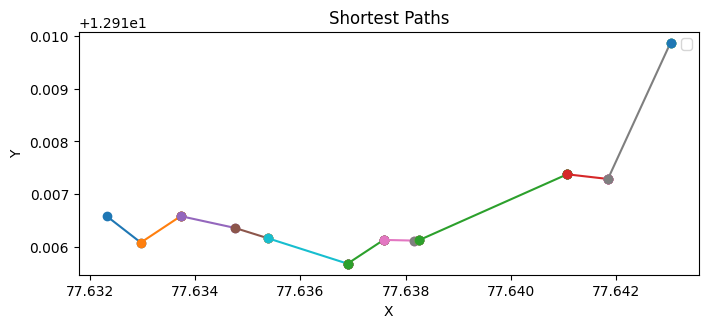

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')  # Plot each path separately with a label
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Shortest Paths')
    ax.legend()  # Show legend to differentiate between paths
    plt.show()

G3 = nx.Graph()
for i in range(len(IT3) - 1):
    G3.add_edge(IT3[i], IT3[i + 1])
shortest_paths = [nx.shortest_path(G3, IT3[i], IT3[i + 1]) for i in range(len(IT3) - 1)]

# Display the shortest paths
display_shortest_paths(shortest_paths, states3)


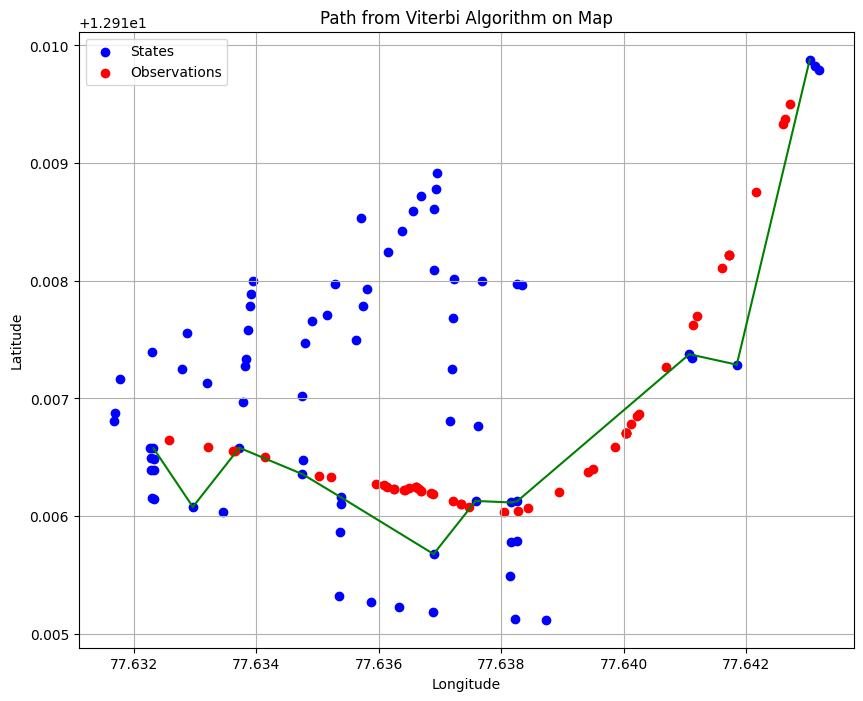

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(states3[:, 1], states3[:, 0], color='blue', label='States')
plt.scatter(qt3[:, 1], qt3[:, 0], color='red', label='Observations')
for i in range(len(IT3) - 1 - 0):
    start_point = states3[IT3[i]]
    end_point = states3[IT3[i + 1]]
    plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='green')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Path from Viterbi Algorithm on Map')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


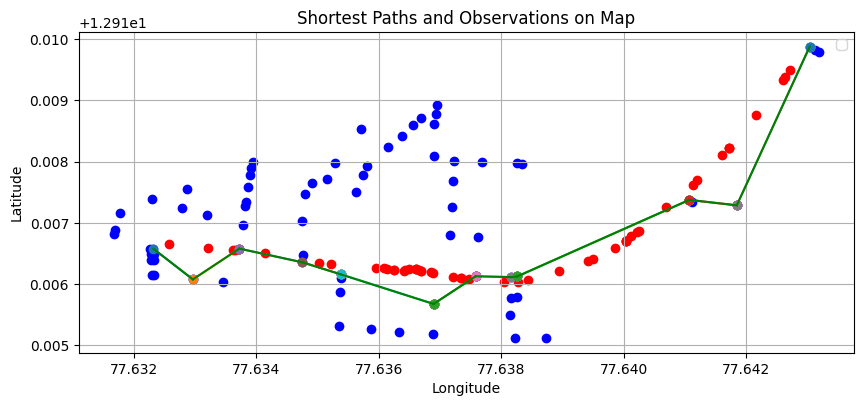

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')  # Plot each path separately with a label

    plt.scatter(states[:, 1], states[:, 0], color='blue')
    plt.scatter(qt3[:, 1], qt3[:, 0], color='red')
    for i in range(len(IT3) - 1):
        start_point = states[IT3[i]]
        end_point = states[IT3[i + 1]]
        ax.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='green')

    ax.set_aspect('equal')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Shortest Paths and Observations on Map')
    ax.legend()  # Show legend to differentiate between paths
    plt.grid(True)
    plt.show()

G3 = nx.Graph()
for i in range(len(IT3) - 1):
    G3.add_edge(IT3[i], IT3[i + 1])
shortest_paths = [nx.shortest_path(G3, IT3[i], IT3[i + 1]) for i in range(len(IT3) - 1)]

# Display the shortest paths along with states and observations
display_shortest_paths(shortest_paths, states3)
